In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats

# Load prepared data

In [4]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/raw/"

## fmap mean for 5 run 

In [5]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [6]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})

In [7]:
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.describe()

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
count,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06,3.244032e+06
mean,3.700000e+01,3.500000e+00,2.150000e+01,3.150000e+01,3.150000e+01,-4.675177e+01,-4.632270e+01,-4.943398e+01,-5.254767e+01,-5.105728e+01,2.070648e+00
std,8.164967e-01,1.707825e+00,1.269843e+01,1.847296e+01,1.847296e+01,3.848085e+02,3.926424e+02,3.857237e+02,3.872141e+02,3.879891e+02,8.492458e+00
min,3.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.422362e+04,-1.461919e+04,-1.252448e+04,-1.425134e+04,-1.239863e+04,-7.759955e+02
25%,3.600000e+01,2.000000e+00,1.075000e+01,1.575000e+01,1.575000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.700000e+01,3.500000e+00,2.150000e+01,3.150000e+01,3.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.800000e+01,5.000000e+00,3.225000e+01,4.725000e+01,4.725000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.800000e+01,6.000000e+00,4.300000e+01,6.300000e+01,6.300000e+01,6.884447e+03,7.646300e+03,7.653812e+03,6.849814e+03,7.587812e+03,7.697382e+02


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


# Calculate the data for Linear Model

In [9]:
m, b = [], []
new0, new1, new2, new3, new4 = [], [], [], [], [] 
for i in range(len(df)):
    x = [0, 2, 4]
    y_all = df.iloc[i, 5:-1].values
    y = [y_all[0], y_all[2], y_all[4]]
    slope, intercept, r, p, stderr = stats.linregress(x,y) 
    
    y_new = y_all/slope - intercept/slope
    y_new[np.isnan(y_new)] = 0
    m.append(slope)
    b.append(intercept)
    new0.append(y_new[0])
    new1.append(y_new[1])
    new2.append(y_new[2])
    new3.append(y_new[3])
    new4.append(y_new[4])

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_71563/710899237.py:9: RuntimeWarning: invalid value encountered in true_divide
  y_new = y_all/slope - intercept/slope
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_71563/710899237.py:9: RuntimeWarning: invalid value encountered in double_scalars
  y_new = y_all/slope - intercept/slope
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_71563/710899237.py:9: RuntimeWarning: divide by zero encountered in true_divide
  y_new = y_all/slope - intercept/slope
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_71563/710899237.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  y_new = y_all/slope - intercept/slope
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_71563/710899237.py:9: RuntimeWarning: invalid value encountered in subtract
  y_new = y_all/slope - intercept/slope


In [10]:
df['new0'] = new0
df['new1'] = new1
df['new2'] = new2
df['new3'] = new3
df['new4'] = new4
df['slope'] = m
df['intercept'] = b
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,new0,new1,new2,new3,new4,slope,intercept
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
np.savetxt(save_path+"fmap_mean_new.txt", df.values, fmt="%s")

In [11]:
df[(df['i']==31) & (df['j']==31) & (df['k']==31)]

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory,new0,new1,new2,new3,new4,slope,intercept
128991,36,1,31,31,31,413.002289,426.249512,371.007721,317.486572,334.302094,34.932812,-0.044802,-0.718103,2.089605,4.809860,3.955198,-19.675049,412.120799
309215,36,2,31,31,31,324.296478,342.949097,291.172485,243.732208,263.510284,41.788628,-0.059902,-1.287326,2.119803,5.241583,3.940098,-15.196548,323.386180
489439,36,3,31,31,31,256.576752,278.151306,229.303864,185.196930,207.566895,41.788628,-0.075303,-1.836137,2.150607,5.750449,3.924697,-12.252464,255.654099
669663,36,4,31,31,31,202.316208,224.840454,178.356110,137.496048,160.452057,41.788628,-0.096440,-2.248567,2.192879,6.096941,3.903560,-10.466038,201.306867
849887,36,5,31,31,31,156.084747,180.730377,136.433899,96.041855,121.829865,41.788628,-0.098221,-2.976132,2.196442,6.913088,3.901779,-8.563721,155.243612
1030111,36,6,31,31,31,118.332359,144.919662,101.000153,61.330914,88.018120,41.788628,-0.095668,-3.603895,2.191337,7.425740,3.904332,-7.578560,117.607330
1210335,37,1,31,31,31,699.899963,725.856934,686.393066,651.878296,681.271912,32.912647,-0.300112,-5.873850,2.600223,10.011577,3.699888,-4.657013,698.502340
1390559,37,2,31,31,31,681.168640,709.709717,671.229187,645.303162,668.624512,32.912647,-0.389812,-9.490827,2.779624,11.046767,3.610188,-3.136032,679.946177
1570783,37,3,31,31,31,669.310791,697.510437,658.584778,627.127808,657.023743,32.912647,-0.497270,-9.677554,2.994541,13.235233,3.502730,-3.071762,667.783295
1751007,37,4,31,31,31,657.727051,685.579773,647.471619,615.370850,646.740906,32.912647,-0.577984,-10.719019,3.155967,14.843696,3.422016,-2.746536,656.139598


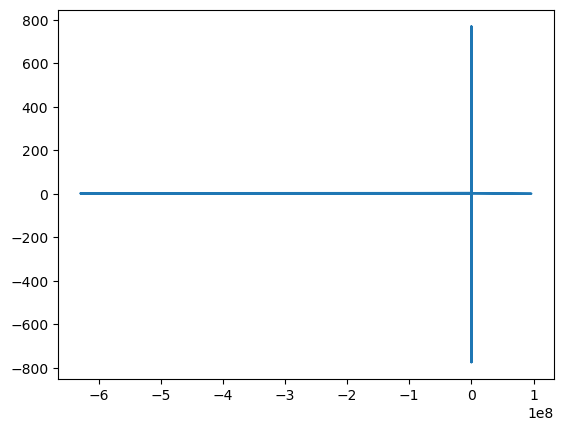

In [12]:
plt.plot(new1, df['theory'].values)

In [ ]:
np.corr(new1, df['theory'].values)

# Playground

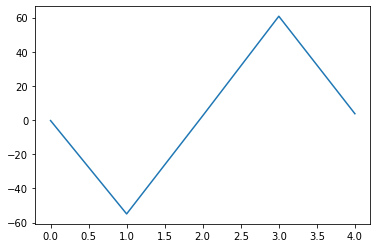

In [65]:
x = [0, 1, 2, 3, 4]
y = [786.106262, 848.382385, 782.896973, 716.524658, 781.549927]
y = y/m - b/m
plt.plot(x, y)

In [66]:
y

array([ -0.27247675, -54.94459633,   2.54495349,  60.8131142 ,
         3.72752325])

In [64]:
print(b, m)

785.7958881666667 -1.1390837499999975


In [62]:
from scipy import stats
x = [0, 2, 4]
y = [786.106262, 782.896973,  781.549927]
m, b, r, p, st_er = stats.linregress(x,y) 

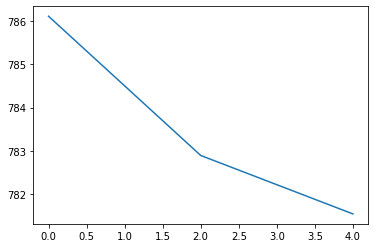

In [63]:
plt.plot(x, y)

In [48]:
from scipy import stats
m, b, r, p, st_er = stats.linregress(x,y) 
print(b,m)

117.66170583333334 -20.757847750000003


In [ ]:
y = mx + b 